In [44]:
import pandas as pd
import numpy as np
from astropy.time import Time
import matplotlib.pyplot as plt


In [45]:
# Convert the data into allesfitter-compliant format
def convert_to_scientific_notation(input_csv, output_csv=None):
    # Read the CSV file into a DataFrame unless a DataFrame is passed
    if isinstance(input_csv, str):
        df = pd.read_csv(input_csv)
    else:
        df = input_csv
        
    # Apply scientific notation with 18 digits after the decimal to each column
    for col in df.columns:
        # Check if the column is of a numeric type
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].apply(lambda x: format(x, '.18e'))

    # If an output file is specified, save the result to this file
    if output_csv:
        df.to_csv(output_csv, index=False)
    else:
        # Otherwise, return the DataFrame
        return df

In [46]:
# Load the data again from the csvs, and now convert the first column from BTJD to BJD
def convert_btjd_to_bjd(input_csv, output_csv=None):
    # Read the CSV file into a DataFrame unless a DataFrame is passed
    if isinstance(input_csv, str):
        df = pd.read_csv(input_csv)
    else:
        df = input_csv
        
    # Convert the first column from BTJD to BJD by adding 2457000.0
    df['time'] = df['time'].apply(lambda x: x + 2457000.0)

    # If an output file is specified, save the result to this file
    if output_csv:
        df.to_csv(output_csv, index=False)
    else:
        # Otherwise, return the DataFrame
        return df


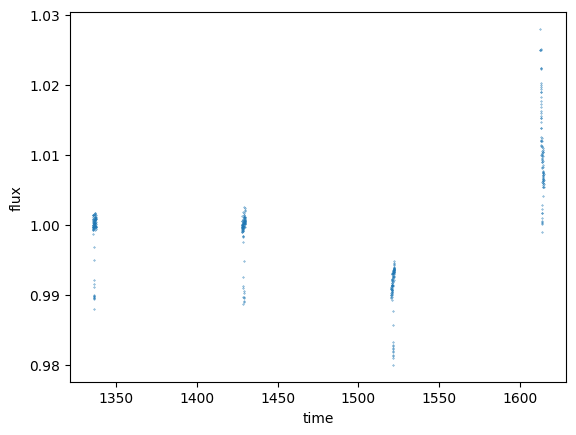

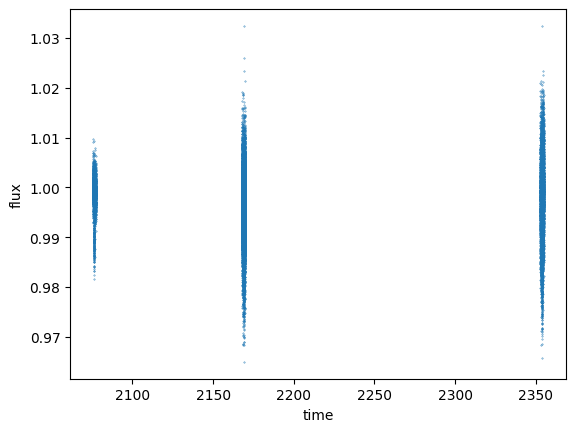

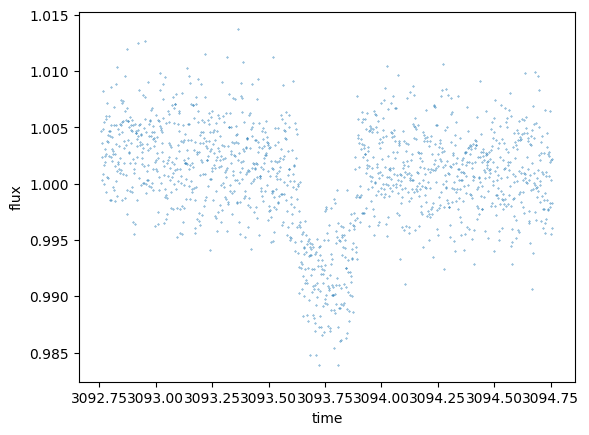

In [47]:
# Load the data
df = pd.read_csv('../data/tess-stitched/raw/toi4409-full-tess-stitched-nonans-filtered1day-sorted_converted.csv')

# Separate the data in 3 parts: before 1750, between, and after 2750
df1 = df[df['time'] < 1750]
df2 = df[(df['time'] >= 1750) & (df['time'] <= 2750)]
df3 = df[df['time'] > 2750]

# Plot the data
df1.plot(x='time', y='flux', kind='scatter', s=0.1)
df2.plot(x='time', y='flux', kind='scatter', s=0.1)
df3.plot(x='time', y='flux', kind='scatter', s=0.1)

# Save the data
df1.to_csv('../data/tess-stitched/allesfitter_converted_2458/4409-tess-lightcurves-1800s.csv', index=False)
df2.to_csv('../data/tess-stitched/allesfitter_converted_2458/4409-tess-lightcurves-600s.csv', index=False)
df3.to_csv('../data/tess-stitched/allesfitter_converted_2458/4409-tess-lightcurves-180s.csv', index=False)

In [48]:
# Load the data
df1 = pd.read_csv('../data/tess-stitched/allesfitter_converted_2458/4409-tess-lightcurves-1800s.csv')
df2 = pd.read_csv('../data/tess-stitched/allesfitter_converted_2458/4409-tess-lightcurves-600s.csv')
df3 = pd.read_csv('../data/tess-stitched/allesfitter_converted_2458/4409-tess-lightcurves-180s.csv')

# Convert the first column from BTJD to BJD
df1 = convert_btjd_to_bjd(df1)
df2 = convert_btjd_to_bjd(df2)
df3 = convert_btjd_to_bjd(df3)

# Remove 2458000.0 from the first column
df1['time'] = df1['time'].apply(lambda x: x - 2458000.0)
df2['time'] = df2['time'].apply(lambda x: x - 2458000.0)
df3['time'] = df3['time'].apply(lambda x: x - 2458000.0)

# Round the first column to 5 decimal places
df1['time'] = df1['time'].apply(lambda x: round(x, 5))
df2['time'] = df2['time'].apply(lambda x: round(x, 5))
df3['time'] = df3['time'].apply(lambda x: round(x, 5))

# # Convert to scientific notation
# df1 = convert_to_scientific_notation(df1)
# df2 = convert_to_scientific_notation(df2)
# df3 = convert_to_scientific_notation(df3)

df1.head()

# # Comment the first line of each of the above 3 dataframes with #
# # df1.columns = df1.columns.str.replace('#', '')
# # df2.columns = df2.columns.str.replace('#', '')
# # df3.columns = df3.columns.str.replace('#', '')

# # Save the dataframes as csv files
df1.to_csv('../data/tess-stitched/allesfitter_converted_2458/4409-tess-lightcurves-1800s.csv', index=False)
df2.to_csv('../data/tess-stitched/allesfitter_converted_2458/4409-tess-lightcurves-600s.csv', index=False)
df3.to_csv('../data/tess-stitched/allesfitter_converted_2458/4409-tess-lightcurves-180s.csv', index=False)

# Comment the first line of each of the above 4 files with #
for filename in ['4409-tess-lightcurves-1800s.csv', '4409-tess-lightcurves-600s.csv', '4409-tess-lightcurves-180s.csv']:
    with open('../data/tess-stitched/allesfitter_converted_2458/' + filename, 'r') as f:
        lines = f.readlines()
    lines[0] = '#' + lines[0]
    with open('../data/tess-stitched/allesfitter_converted_2458/' + filename, 'w') as f:
        f.writelines(lines)


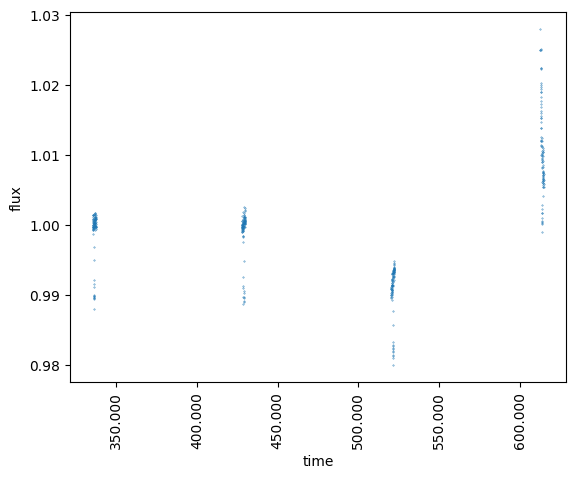

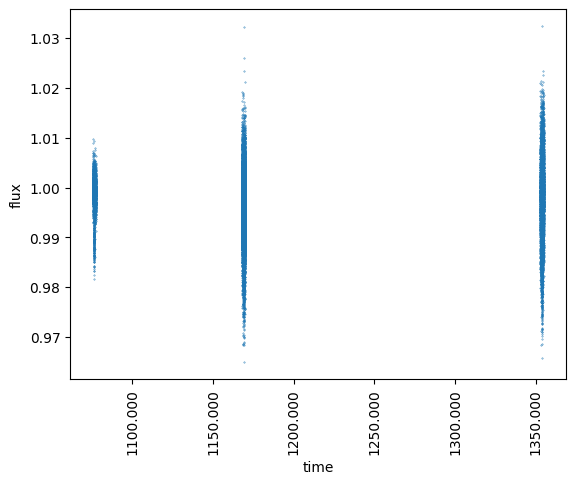

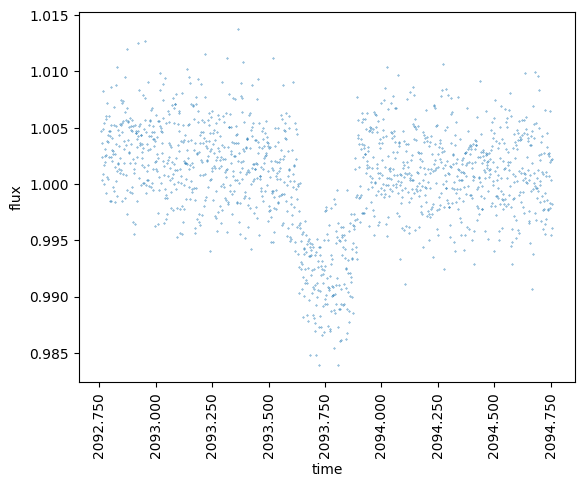

In [49]:
# Load the above 3 files
df1 = pd.read_csv('../data/tess-stitched/allesfitter_converted_2458/4409-tess-lightcurves-1800s.csv')
df2 = pd.read_csv('../data/tess-stitched/allesfitter_converted_2458/4409-tess-lightcurves-600s.csv')
df3 = pd.read_csv('../data/tess-stitched/allesfitter_converted_2458/4409-tess-lightcurves-180s.csv')

# Remove the # from the first line of each of the above 3 files
df1.columns = df1.columns.str.replace('#', '')
df2.columns = df2.columns.str.replace('#', '')
df3.columns = df3.columns.str.replace('#', '')

# Plot the data with the x axis with angled ticks and written in full values
df1.plot(x='time', y='flux', kind='scatter', s=0.1, rot=90).get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))
# df2.plot(x='time', y='flux', kind='scatter', s=0.1, rot=90).xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}')).figure.axes[0].set_xlabel('Time (BJD+2458000)')
df2.plot(x='time', y='flux', kind='scatter', s=0.1, rot=90).get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))
df3.plot(x='time', y='flux', kind='scatter', s=0.1, rot=90).get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))


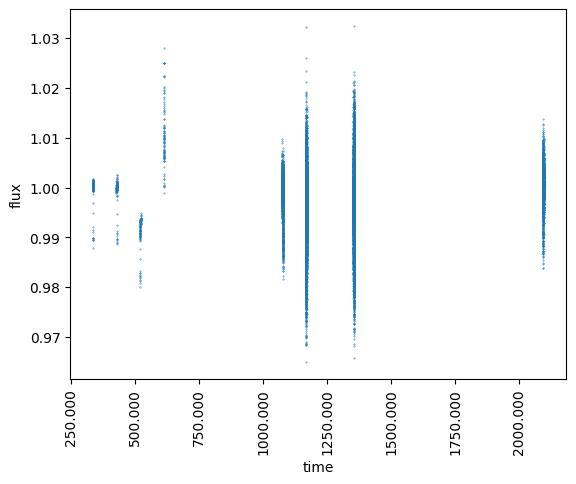

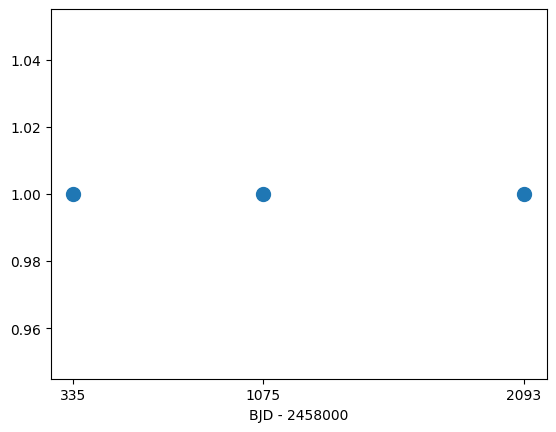

In [50]:
# Combine the above 4 dfs into one and plot it
df = pd.concat([df1, df2, df3])
df.plot(x='time', y='flux', kind='scatter', s=0.1, rot=90).get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))

# For each df, drop all except the first row
df1 = df1.iloc[0:1]
df2 = df2.iloc[0:1]
df3 = df3.iloc[0:1]

# Combine the above 4 dfs into one and plot it
df = pd.concat([df1, df2, df3])
# df.plot(x='time', y='flux', kind='scatter', s=0.1, rot=0).get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))

# Change each value of flux to exactly 1.0
df['flux'] = 1.0

# Plotting
fig, ax = plt.subplots()
scatter = ax.scatter(df['time'], df['flux'], s=100)

# Customizing the x-axis to show labels only at data points
ax.set_xticks(df['time'])
ax.set_xticklabels([f'{x:.0f}' for x in df['time']], rotation=0)
ax.set_xlabel("BJD - 2458000")

plt.show()

In [51]:
def find_large_gaps_and_filter_df(df, x):
    """
    Given a pandas DataFrame with a time series, filters the DataFrame to keep only 
    rows where the time that has passed between observations is more than x, 
    starting with the first value.

    Parameters:
    df (pandas.DataFrame): DataFrame with a 'time' column.
    x (int or float): Threshold for the time gap.

    Returns:
    pandas.DataFrame: Filtered DataFrame.
    """
    # Ensure the DataFrame is sorted by time
    df = df.sort_values(by='time')

    # Calculate the differences between consecutive times
    time_diff = df['time'].diff()

    # Find the indexes where the time gap is greater than x or where it's the first value
    gap_indexes = time_diff[time_diff > x].index
    keep_indexes = [0] + list(gap_indexes)

    # Filter the DataFrame to keep only the relevant rows
    filtered_df = df.iloc[keep_indexes]

    return filtered_df


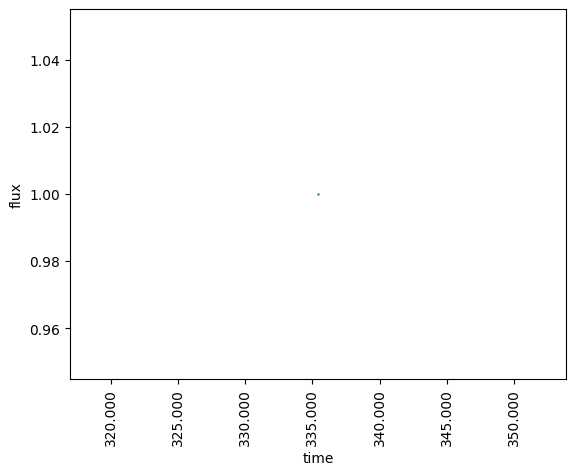

In [54]:
only_one_per_gap = find_large_gaps_and_filter_df(df, 1)

# Plot
only_one_per_gap.plot(x='time', y='flux', kind='scatter', s=0.1, rot=90).get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))